In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import LabelEncoder   
import warnings
warnings.filterwarnings('ignore')

In [56]:
phone_prediction = pd.read_csv("../input/phone-prediction/train.csv")


In [57]:
phone_prediction.describe 

<bound method NDFrame.describe of         id              Name  Age             Gender         Location  \
0        0      Safia Daoudi   18  Prefer not to say            Médéa   
1        1  Soufiane Merabet   18             Female       Ouled Naïl   
2        2      Yacine Bahri   16             Female  Chabet el Ameur   
3        3     Hayat Bachiri   18               Male        Aïn Arnat   
4        4     Fatima Lounes   17             Female         Chellata   
...    ...               ...  ...                ...              ...   
2396  2396   Farida Aissaoui   14             Female     Djebla Zerga   
2397  2397        Asma Rabhi   17  Prefer not to say    Laïd Madjdoub   
2398  2398     Zakaria Attia   17               Male    Ouled Adouane   
2399  2399     Sara Amrouche   13               Male     Tala Ifacene   
2400  2400     Sarah Khelifa   13               Male         Laghouat   

     School_Grade  Daily_Usage_Hours  Sleep_Hours  Academic_Performance  \
0            1

In [58]:
phone_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2401 non-null   int64  
 1   Name                    2401 non-null   object 
 2   Age                     2401 non-null   int64  
 3   Gender                  2401 non-null   object 
 4   Location                2401 non-null   object 
 5   School_Grade            2401 non-null   object 
 6   Daily_Usage_Hours       2401 non-null   float64
 7   Sleep_Hours             2401 non-null   float64
 8   Academic_Performance    2401 non-null   int64  
 9   Social_Interactions     2401 non-null   int64  
 10  Exercise_Hours          2401 non-null   float64
 11  Anxiety_Level           2401 non-null   int64  
 12  Depression_Level        2401 non-null   int64  
 13  Self_Esteem             2401 non-null   int64  
 14  Parental_Control        2401 non-null   

based on the dataset we are dealing with 2,401 Algerian people , focusing on their age, gender, location, school grade, and smartphone habits. tracking daily and weekend usage, screen time, sleep hours, academic performance, and phone usage purposes like social media, gaming, or education. Additional features include phone checks per day, time spent on various activities, and addiction levels (0–10). The data looks clean and well-structured, offering a solid base to explore how phone habits may relate to academic performance, sleep, and social behavior.

In [59]:
phone_prediction.isnull().sum()

id                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

All columns appear to be non-null and properly typed, indicating a clean and complete dataset — making it a strong foundation for analysis on how digital behavior affects well-being and academic outcomes which also means that this data is clean for analysis and phone addiction predictions later !

# eda


=== TARGET VARIABLE ANALYSIS ===
Addiction Level Statistics:
count    2401.000000
mean        8.873886
std         1.624853
min         1.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Addiction_Level, dtype: float64


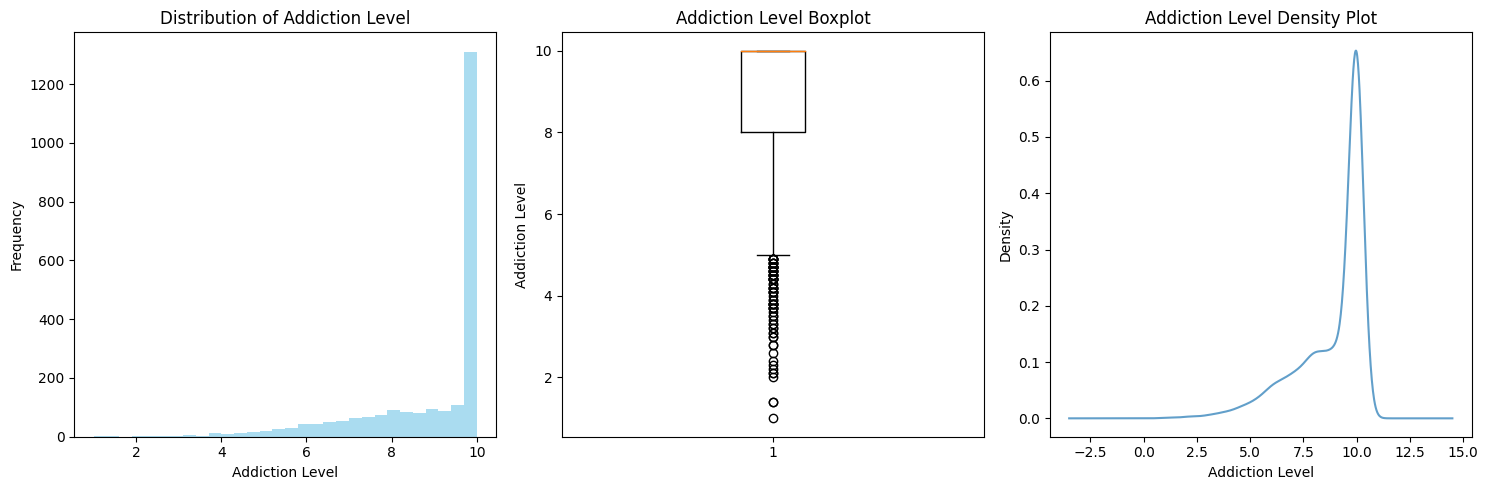

In [60]:
print("\n=== TARGET VARIABLE ANALYSIS ===")
print("Addiction Level Statistics:")
print(phone_prediction['Addiction_Level'].describe())

# Visualize target distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(phone_prediction['Addiction_Level'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Addiction Level')
plt.xlabel('Addiction Level')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(phone_prediction['Addiction_Level'])
plt.title('Addiction Level Boxplot')
plt.ylabel('Addiction Level')

plt.subplot(1, 3, 3)
phone_prediction['Addiction_Level'].plot(kind='density', alpha=0.7)
plt.title('Addiction Level Density Plot')
plt.xlabel('Addiction Level')

plt.tight_layout()
plt.show()

So based on the output here :

The addiction level is the key variable here, and from the plots and stats, it’s shouting a few things loud and clear:
📈 Statistics Summary

    Count: 2,401 — every student has a value, no missing data 

    Mean: ~8.87 — very high average, suggests phone addiction is kinda the norm here.

    Median (50%): 10 — half the kids hit the maximum addiction score.

    25% Quartile: 8

    75% Quartile: 10

    Min: 1 (rare low usage)

    Max: 10 (maxed out)

So 75% of students rate their addiction between 8 and 10. 

 now looking at the Histogram :

    The frequency spikes hard at 10 — looks like over 1,200 students maxed their addiction score.

    This tells us the distribution is heavily skewed right, with most data concentrated at the upper end.

Boxplot:

    Outliers below ~5 stand out — these are the rfew with low addiction levels. 

    The IQR is tight (between 8 and 10), reinforcing how packed the top scores are.

    Basically, it’s a fat-top, skinny-bottom box — meaning the addiction is normalized at a high level.

Density Plot

    The curve peaks sharply just before 10 and drops immediately after .

    Very little variation or spread below 7. 
    
 Conclusion :

    Most students self-report very high smartphone addiction levels.

    The variable has low variability in the upper range, meaning most users are glued to their screens.

    

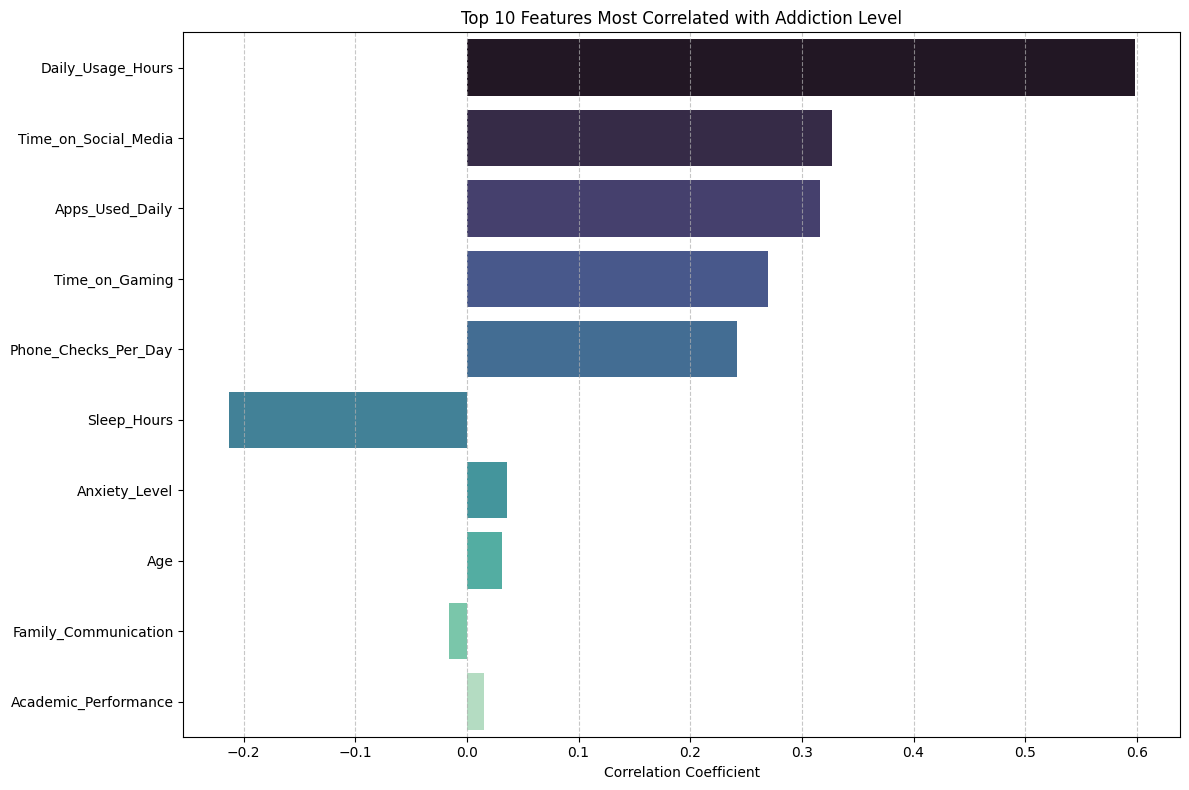

In [61]:
# Correlation with Addiction_Level (numeric features only)
correlation = phone_prediction.corr(numeric_only=True)['Addiction_Level']\
                      .drop('Addiction_Level')\
                      .sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation.values[:10], y=correlation.index[:10], palette='mako')
plt.title('Top 10 Features Most Correlated with Addiction Level')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The top factors most strongly correlated with smartphone addiction are clearly centered around digital activity intensity. The highest positive correlation is with Daily_Usage_Hours, followed closely by Time_on_Social_Media, Apps_Used_Daily, and Time_on_Gaming. Frequent Phone_Checks_Per_Day also show a noticeable connection to higher addiction levels. On the flip side, Sleep_Hours has a negative correlation, suggesting that more addicted students tend to sleep less. Other features like Anxiety_Level, Age, Family_Communication, and even Academic_Performance show very weak correlations, meaning addiction seems to be more behaviorally driven than demographically or academically. 

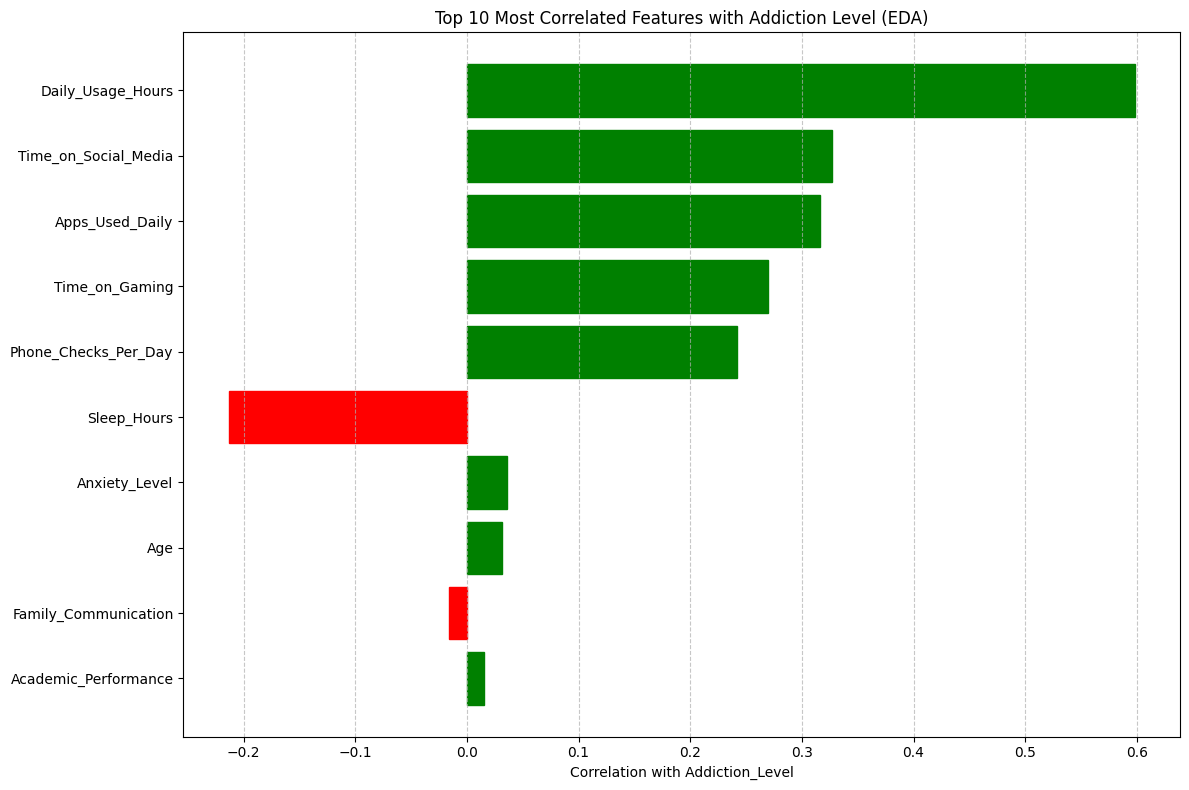

In [62]:

correlation = phone_prediction.corr(numeric_only=True)['Addiction_Level']\
                      .drop('Addiction_Level')\
                      .sort_values(key=abs, ascending=False)

top_10_corr = correlation.head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_corr.index, top_10_corr.values)

for bar, value in zip(bars, top_10_corr.values):
    bar.set_color('green' if value >= 0 else 'red')

plt.xlabel('Correlation with Addiction_Level')
plt.title('Top 10 Most Correlated Features with Addiction Level (EDA)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


now in this part we are highlighting both positive (green) and negative (red) influences. The strongest positive correlation comes from Daily_Usage_Hours, confirming that the more time spent on phones daily, the higher the addiction level. Other big contributors include Time_on_Social_Media, Apps_Used_Daily, Time_on_Gaming, and Phone_Checks_Per_Day. On the flip side, Sleep_Hours shows a noticeable negative correlation, meaning heavier phone users tend to sleep less. Minor negative links also appear with Family_Communication and Academic_Performance, though their effects seem much weaker. Overall, high phone engagement and low sleep are the clearest addiction indicators.


=== DEMOGRAPHIC ANALYSIS ===


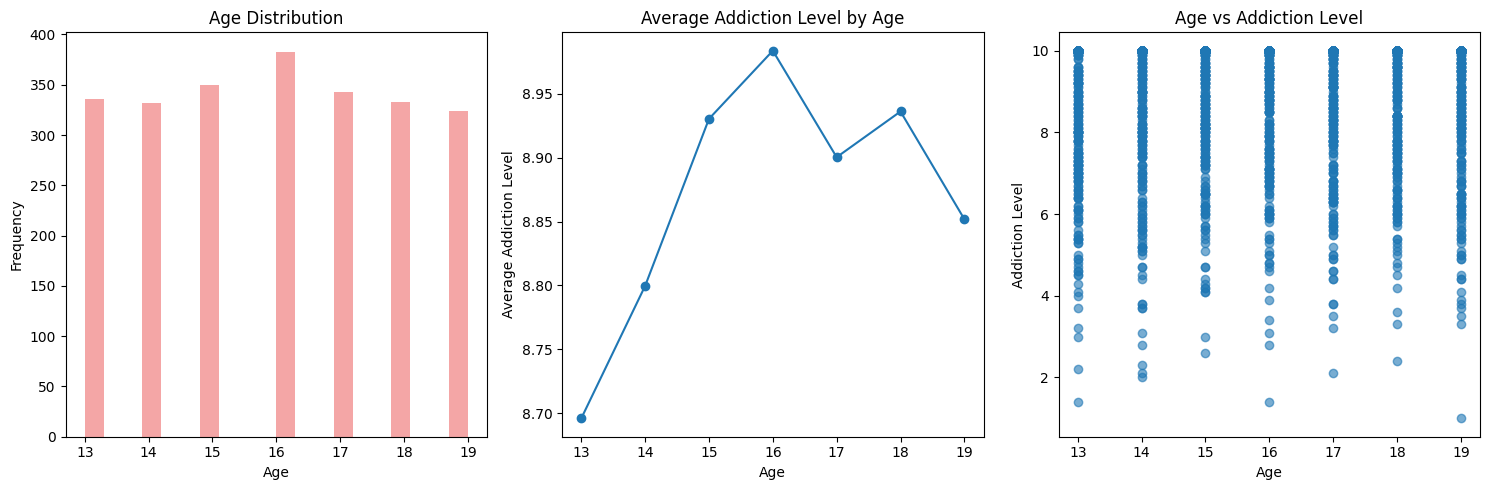

In [63]:
# 5. DEMOGRAPHIC ANALYSIS
print("\n=== DEMOGRAPHIC ANALYSIS ===")

# Age distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(phone_prediction['Age'], bins=20, alpha=0.7, color='lightcoral')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
age_addiction = phone_prediction.groupby('Age')['Addiction_Level'].mean()
plt.plot(age_addiction.index, age_addiction.values, marker='o')
plt.title('Average Addiction Level by Age')
plt.xlabel('Age')
plt.ylabel('Average Addiction Level')

plt.subplot(1, 3, 3)
plt.scatter(phone_prediction['Age'], phone_prediction['Addiction_Level'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Addiction Level')
plt.title('Age vs Addiction Level')

plt.tight_layout()
plt.show()

this reveals that the dataset has a fairly even age distribution, with a slight peak at age 16. The average phone addiction level tends to increase from age 13, peaking around age 16, and then slightly declining by age 19. This suggests that mid-teenagers, particularly those aged 15–17, may exhibit higher levels of phone addiction. The scatter plot on the right supports this trend, showing consistently high addiction levels across all ages, with many individuals reaching the maximum level of 10.


# Prediction workflow : 

In [64]:
modeling_data = phone_prediction.copy()

modeling_data = modeling_data.drop(['id', 'Name', 'Location'], axis=1)

modeling_data = pd.get_dummies(modeling_data, drop_first=True)

X = modeling_data.drop('Addiction_Level', axis=1)
y = modeling_data['Addiction_Level'] 

model = LinearRegression()
model.fit(X, y)

LinearRegression()



In this code, we prepare a dataset for training a basic linear regression model to predict phone addiction levels after we got all the analysis we need :

   - A copy of the original dataset is made to preserve the original 
   - Irrelevant or non-numeric columns such as `id`, `Name`, and `Location` are dropped since they don't contribute meaningfully to the prediction.
   - Categorical variables are transformed into numeric format using one-hot encoding (`pd.get_dummies`), with `drop_first=True` to avoid multicollinearity.
   - Features (`X`) are separated from the target variable (`y`). The target here is `Addiction_Level`.
   - A basic `LinearRegression` model from `sklearn` is initialized and trained on the prepared feature and target data.

In [65]:
# Train the model on ALL the training data (no splits)
X = modeling_data.drop('Addiction_Level', axis=1)
y = modeling_data['Addiction_Level']

# Initialize and train linear regression
model = LinearRegression()
model.fit(X, y)

print("✓ Model trained successfully!")
print(f"Model trained on {X.shape[0]} samples with {X.shape[1]} features")

✓ Model trained successfully!
Model trained on 2401 samples with 29 features



Now In this step, the entire dataset is used to train the linear regression model without splitting into training and test sets:
   - The feature matrix `X` and target vector `y` are again defined by dropping the `Addiction_Level` column from the dataset.
   - This time, no data is held out for validation or testing — the model is trained on all available data.
   - A `LinearRegression` model is instantiated and trained on the full dataset.
   - The training is confirmed with printed messages showing how many samples and features were used.




In [66]:
train_predictions = model.predict(X)
train_mse = mean_squared_error(y, train_predictions)
train_r2 = r2_score(y, train_predictions)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")



Training MSE: 0.6633
Training R²: 0.7487


After training the linear regression model, its performance is evaluated based on:

1. Prediction*
   - The model generates predictions (`train_predictions`) for the training features `X`.

2. Performance Metrics:
   - Mean Squared Error (MSE): Measures the average squared difference between actual and predicted addiction levels.  
     - `Training MSE: 0.6633` → Indicates relatively low average error in prediction.
   - R² Score (Coefficient of Determination): Represents how well the model explains the variance in the target variable.
     - `Training R²: 0.7487` → The model explains ~75% of the variance in phone addiction levels, which is a solid baseline.



## Model Upgrade: Trying Random Forest for Better Results

After training a linear regression model, it achieved a decent R² score (~0.75), but there was room for improvement. Linear regression assumes a linear relationship between the features and the target, which may not fully capture the complexity of user behavior and phone addiction.

To improve prediction performance, a Random Forest Regressor was introduced:
- Random Forest is a non-linear, ensemble-based model that combines multiple decision trees.
- It handles both linear and non-linear relationships effectively.
- It’s robust to outliers and less sensitive to multicollinearity or feature scaling.

In [67]:


data = phone_prediction.copy()

data = data.drop(['id', 'Name', 'Location'], axis=1)

data = pd.get_dummies(data, drop_first=True)

X = data.drop('Addiction_Level', axis=1)
y = data['Addiction_Level']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

val_preds = rf_model.predict(X_val)

rf_mse = mean_squared_error(y_val, val_preds)
rf_r2 = r2_score(y_val, val_preds)

print(f"Validation MSE: {rf_mse:.4f}")
print(f"Validation RMSE: {rf_mse**0.5:.4f}")
print(f"Validation R²: {rf_r2:.4f}")


Validation MSE: 0.3317
Validation RMSE: 0.5760
Validation R²: 0.8617


This code builds and evaluates a Random Forest Regressor to predict phone addiction levels more accurately:

1. Data Preparation :
   - A fresh copy of the original dataset is made.
   - Irrelevant columns (`id`, `Name`, `Location`) are removed.
   - Categorical variables are one-hot encoded using `pd.get_dummies`.

2. Train-Test Split :
   - The data is split into training and validation sets using an 80/20 ratio for more realistic evaluation.

3. Model Training :
   - A `RandomForestRegressor` is instantiated and trained on the training data (`X_train`, `y_train`).

4. Prediction & Evaluation:
   - Predictions are made on the validation set.
   - Model performance is assessed using:
     - MSE (0.3317): Lower error than the linear model.
     - RMSE (0.5760): The root of MSE, making the error more interpretable.
     - R² (0.8617): Strong improvement in explained variance.


# test 

In [68]:
test_prediction = pd.read_csv("../input/phone-prediction/test.csv")


In [69]:
X_test = test_prediction.drop(['id', 'Name', 'Location'], axis=1)

X_test = pd.get_dummies(X_test, drop_first=True)

missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

X_test = X_test[X.columns]  


preds = rf_model.predict(X_test)


submission = pd.DataFrame({
    'id': test_prediction['id'],
    'Predicted_Addiction_Level': preds
})


submission.to_csv('becca_forest_submission.csv', index=False)

print(" Submission file created ")



 Submission file created 


In [70]:
submission.head()


,id,Predicted_Addiction_Level
0,0,8.117
1,1,9.008
2,2,7.575
3,3,9.141
4,4,9.958


In [71]:

submission = pd.DataFrame({
    'id': test_prediction['id'],
    'Predicted_Addiction_Level': preds
})


submission.to_csv('becca_forest_submission.csv', index=False)